# Water Features of Pittsburgh
### First Idea

At first I was planning on plotting data for locations where slope is 25% or greater in Pittsburgh, as to identify areas that would be hard to walk on and therefore easy to slip and fall. However after importing, I recognized the csv file did not have the locations of neighborhoods, longitude, or latitude as a column, making it difficult to plot.

In [37]:
import geopandas as gpd
import matplotlib.pyplot as plt

slope = pd.read_csv("25_or_Greater_Slope.csv")
print(slope.columns)
print(slope.info())

Index(['objectid_1', 'objectid', 'created_us', 'created_da', 'last_edite',
       'last_edi_1', 'slope25', 'shape__are', 'shape__len', 'Shape__Area',
       'Shape__Length'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1714 entries, 0 to 1713
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   objectid_1     1714 non-null   int64  
 1   objectid       1714 non-null   int64  
 2   created_us     1714 non-null   object 
 3   created_da     1714 non-null   object 
 4   last_edite     1714 non-null   object 
 5   last_edi_1     1714 non-null   object 
 6   slope25        1714 non-null   object 
 7   shape__are     1714 non-null   float64
 8   shape__len     1714 non-null   float64
 9   Shape__Area    1714 non-null   float64
 10  Shape__Length  1714 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 147.4+ KB
None


## Switching CSV Ideas
After discovering a new file marking all “water fountains, spray fountains and other assets which provide water for public use.” This contained the necessary information in the file, and would cause a danger to anyone unformate enough to walk by and fall on the slippery surface. 


In [38]:
slope = pd.read_csv("Water_Features.csv")
print(slope.columns)
print(slope.info())

Index(['_id', 'id', 'name', 'control_type', 'feature_type', 'inactive', 'make',
       'image', 'neighborhood', 'council_district', 'ward', 'tract',
       'public_works_division', 'pli_division', 'police_zone', 'fire_zone',
       'latitude', 'longitude'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _id                    232 non-null    int64  
 1   id                     232 non-null    int64  
 2   name                   232 non-null    object 
 3   control_type           203 non-null    object 
 4   feature_type           232 non-null    object 
 5   inactive               185 non-null    object 
 6   make                   162 non-null    object 
 7   image                  196 non-null    object 
 8   neighborhood           232 non-null    object 
 9   council_district       232 non-null   

## Plotting Points Without Pittsburgh
First, I attempted to plot all the water points without the neighborhoods. Simply based off each others coordinates

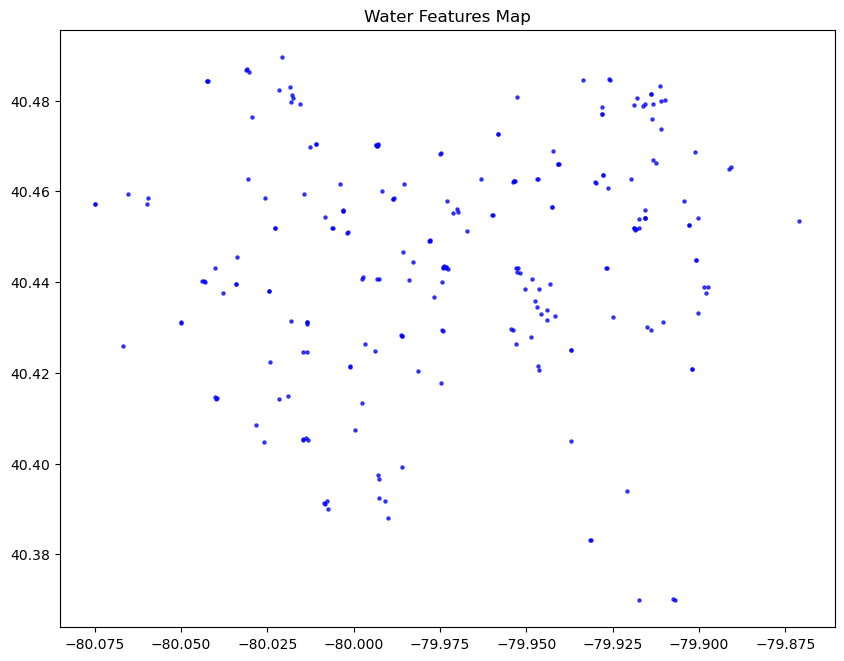

In [39]:
geometry = [Point(xy) for xy in zip(slope['longitude'], slope['latitude'])]
waterPoints = gpd.GeoDataFrame(slope, geometry=geometry, crs="EPSG:4326")

#plot locations
waterPoints.plot(figsize=(10, 10), color='blue', markersize=5, alpha=0.7)
plt.title("Water Features Map")
plt.show()

## Plotting Points in Pittsburgh
Next, I imported the neighborhood shape file, and overlaid the water locations on top of it.

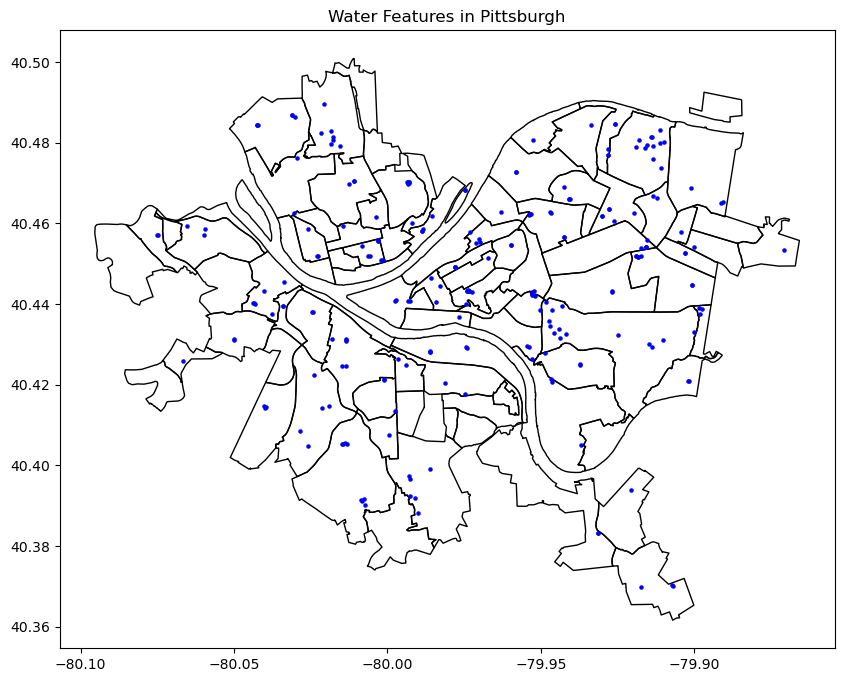

In [40]:
neighborhoods = gpd.read_file("Neighborhoods/Neighborhoods_.shp")
waterPointsLinedUp = waterPoints.to_crs(neighborhoods.crs)#this lines up the points with neighborhoods
ax = neighborhoods.plot(figsize=(10, 10), edgecolor='black', facecolor='none')

#this puts the data on top of the neighboorhods
waterPointsLinedUp.plot(ax=ax, color='blue', markersize=5)

plt.title("Water Features in Pittsburgh")
plt.show()

## Counting Locations per Neighborhood + Heatmap
To make my final map, I counted how many water data locations were in each neighborhood, and created a new column to keep track of it. After that I turned it into a heat map.


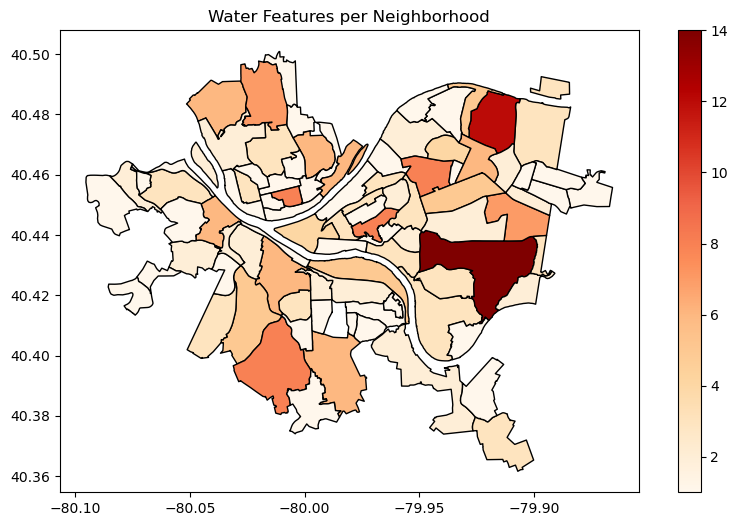

In [41]:
#puts the data points joined into neighboorhoods and counts them
joined = gpd.sjoin(neighborhoods, waterPoints, how="left", predicate='contains')
neighborhoodCounts = joined.groupby(joined.index).size()
#add count of water feature data to each neighborhoods data
neighborhoods['water_count'] = neighborhoodCounts
neighborhoods['water_count'] = neighborhoods['water_count'].fillna(0)

ax = neighborhoods.plot(column='water_count', cmap='OrRd', legend=True, edgecolor='black', figsize=(10, 6))
ax.set_title("Water Features per Neighborhood")
plt.show()

In [42]:
#Sorts water_count and prints it
top_neighborhood = neighborhoods.sort_values(by='water_count', ascending=False).head(5)
print(top_neighborhood[['hood', 'water_count']])

                   hood  water_count
24  Squirrel Hill South           14
36        Highland Park           12
65      Terrace Village            8
58     Allegheny Center            8
31           Bloomfield            8


## Conclusion
The neighboorhood with the most water features is Squirrel Hill South with 14 total
